In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
dfA = df.copy()

## 0 = Tidak Beracun
## 1 = Beracun

In [8]:
for i in dfA.columns:
    label = LabelEncoder()
    label.fit(dfA[i])
    dfA['new_'+i] = label.transform(dfA[i])
dfA

dfA['new_class']

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: new_class, Length: 8124, dtype: int32

In [9]:
kol = dfA[['new_cap-shape', 'new_cap-surface',
       'new_cap-color', 'new_bruises', 'new_odor',
       'new_gill-attachment', 'new_gill-spacing', 'new_gill-size',
       'new_gill-color', 'new_stalk-shape', 'new_stalk-root',
       'new_stalk-surface-above-ring', 'new_stalk-surface-below-ring',
       'new_stalk-color-above-ring', 'new_stalk-color-below-ring',
       'new_veil-type', 'new_veil-color', 'new_ring-number',
       'new_ring-type', 'new_spore-print-color', 'new_population',
       'new_habitat']]


In [11]:
xtr, xts, ytr, yts = train_test_split(kol, dfA['new_class'], test_size=.2)
print(len(xtr), len(xts), len(ytr), len(yts))

6499 1625 6499 1625


## Hyperparameter Tuning for Logistic Regression

In [12]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

param = {
    'penalty': penalty, 'solver': solver, 'max_iter': max_iter
}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

## Modelling

In [13]:
model = LogisticRegression()

In [62]:
modelgs = GridSearchCV(
    estimator = model, 
    param_grid = param,
    cv = 5)

modelgs

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [1, 10, 100, 1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [64]:
modelgs.fit(xtr, ytr)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Libli

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [1, 10, 100, 1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [65]:
modelgs.best_params_

{'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}

In [66]:
modelfix = LogisticRegression(max_iter= 100, penalty= 'none', solver= 'newton-cg')

In [67]:
modelfix.fit(xtr, ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluation Metrics

### Balanced Accuracy

In [68]:
print('Balanced Accuracy: ' ,balanced_accuracy_score(yts, modelfix.predict(xts)))

Balanced Accuracy:  0.9665431904161412


#### Precision

In [69]:
print('Precision: ' ,precision_score(yts, modelfix.predict(xts)))

Precision:  0.9743260590500642


#### Recall

In [70]:
print('Recall: ' ,recall_score(yts, modelfix.predict(xts)))

Recall:  0.957124842370744


#### F1 Score

In [71]:
print('F1 score: ' ,f1_score(yts, modelfix.predict(xts)))

F1 score:  0.9656488549618322


#### ROCAUC

In [72]:
print('ROCAUC: ' ,roc_auc_score(yts, modelfix.predict(xts)))

ROCAUC:  0.9665431904161412


## PLOT ROCAUC

In [73]:
dfB = pd.DataFrame()
dfB['new_class'] = dfA['new_class'].copy()
dfB.head()

,new_class
0,1
1,0
2,0
3,1
4,0


In [74]:
dfB['proba'] = modelfix.predict_proba(kol)[:,1]
dfB.head()

,new_class,proba
0,1,9.617985e-01
1,0,1.988591e-01
2,0,6.173241e-03
3,1,9.443415e-01
4,0,1.660510e-25


In [75]:
# y prediksi dgn threshold 0.1 - 0.9
dfB['y pred 0.1'] = dfB['proba'].apply(lambda x: 1 if (x > 0.1) else 0)
dfB['y pred 0.2'] = dfB['proba'].apply(lambda x: 1 if (x > 0.2) else 0)
dfB['y pred 0.3'] = dfB['proba'].apply(lambda x: 1 if (x > 0.3) else 0)
dfB['y pred 0.4'] = dfB['proba'].apply(lambda x: 1 if (x > 0.4) else 0)
dfB['y pred 0.5'] = dfB['proba'].apply(lambda x: 1 if (x > 0.5) else 0)
dfB['y pred 0.6'] = dfB['proba'].apply(lambda x: 1 if (x > 0.6) else 0)
dfB['y pred 0.7'] = dfB['proba'].apply(lambda x: 1 if (x > 0.7) else 0)
dfB['y pred 0.8'] = dfB['proba'].apply(lambda x: 1 if (x > 0.8) else 0)
dfB['y pred 0.9'] = dfB['proba'].apply(lambda x: 1 if (x > 0.9) else 0)
dfB

,new_class,proba,y pred 0.1,y pred 0.2,y pred 0.3,y pred 0.4,y pred 0.5,y pred 0.6,y pred 0.7,y pred 0.8,y pred 0.9
0,1,9.617985e-01,1,1,1,1,1,1,1,1,1
1,0,1.988591e-01,1,0,0,0,0,0,0,0,0
2,0,6.173241e-03,0,0,0,0,0,0,0,0,0
3,1,9.443415e-01,1,1,1,1,1,1,1,1,1
4,0,1.660510e-25,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8119,0,1.409808e-07,0,0,0,0,0,0,0,0,0
8120,0,2.999735e-33,0,0,0,0,0,0,0,0,0
8121,0,5.252358e-07,0,0,0,0,0,0,0,0,0
8122,1,8.653670e-01,1,1,1,1,1,1,1,1,0


In [76]:
# fp rate dan tp rate untuk y dan y pred threshold 0.1 - 0.9
roc = []
for i in range(1, 10):
    tn, fp, fn, tp = confusion_matrix(dfB['new_class'], dfB[f'y pred {i/10}']).reshape(-1,)
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    roc.append([fpr, tpr])
    
roc = np.array(roc)
roc

array([[0.13046578, 1.        ],
       [0.08412548, 0.9959142 ],
       [0.06154943, 0.98493361],
       [0.04301331, 0.97420838],
       [0.03374525, 0.96322778],
       [0.02542776, 0.94892748],
       [0.01687262, 0.92824311],
       [0.01211977, 0.89581205],
       [0.01140684, 0.81894791]])

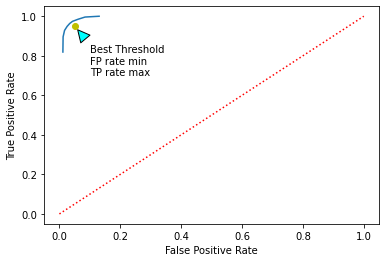

In [77]:
plt.plot(roc[:,0], roc[:,1]) # curva roc-nya
plt.plot(0.05,0.95,'yo')
plt.plot([0,1], [0,1], 'r:')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.annotate('Best Threshold\nFP rate min\nTP rate max', xy=(0.05,0.95), xytext=(.1, .7),
            arrowprops=dict(facecolor='cyan', shrink=.2))
plt.show()

## PLOT ROC CURVE

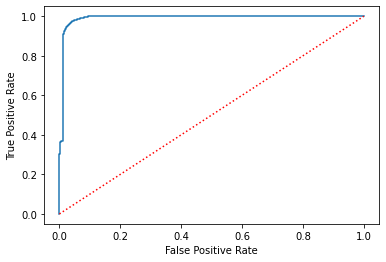

In [78]:
fpr, tpr, thres = roc_curve(dfB['new_class'], modelfix.predict_proba(kol)[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## LUAS AUC

In [79]:
luas = roc_auc_score(dfB['new_class'], modelfix.predict(kol))
print('Luas AUC adalah ', luas)

Luas AUC adalah  0.9647412681521068
